<a href="https://colab.research.google.com/github/johntzwei/metric-statistical-advantage/blob/main/power_analysis_summeval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=0.73)
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})
import matplotlib.pyplot as plt

from statsmodels.stats.power import TTestIndPower

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Power analysis

In [ ]:
def generate_heatmap(true_mean_var, effect_size, alpha=0.05, power=0.80, labelsize=7):
    # rows=variance, columns=effect size
    settings = np.array([ [j/i for j in effect_size ] for i in true_mean_var ])

    # perform power analysis
    analysis = TTestIndPower()
    f = lambda x: analysis.solve_power(effect_size=x, alpha=alpha, power=power)
    vf = np.vectorize(f)
    ns = vf(settings)*2
    
    f, ax = plt.subplots(figsize=(3, 1.8))
    cmap = sns.cm.rocket_r
    p = sns.heatmap(np.log(ns), annot=ns, fmt='.0f',
            cmap=cmap)
    p.set_yticklabels(true_mean_var)
    p.set_xticklabels(effect_size)
    plt.xlabel('Difference in system quality')
    plt.ylabel('True mean std. deviation')

### Experimental parameters

In [ ]:
# parameters for power analysis
ALPHA = 0.05
POWER = 0.95

# x, y for summeval
true_mean_var = np.around(np.linspace(0.4, 0.7, 6, endpoint=True)[::-1], 2)
effect_size = [0.1, 0.2, 0.3, 0.4, 0.5]

# Results

### Graph

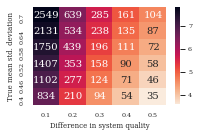

In [ ]:
generate_heatmap(true_mean_var, effect_size, alpha=ALPHA, power=POWER)